 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_rtn = pd.read_csv(whale_returns_csv,index_col = "Date",infer_datetime_format = True, parse_dates = True)
whale_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
# YOUR CODE HERE
whale_rtn.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_rtn.dropna(inplace=True)
whale_rtn.isnull().sum()
whale_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_rtn = pd.read_csv(algo_returns_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
algo_rtn.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
# YOUR CODE HERE
algo_rtn.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_rtn.dropna(inplace=True)
algo_rtn.isnull().sum()
algo_rtn.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [42]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_hist = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True)

sp500_hist.sort_index(inplace=True)
sp500_hist.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [43]:
# Check Data Types
# YOUR CODE HERE
sp500_hist.dtypes

Close    object
dtype: object

In [44]:
# Fix Data Types
# YOUR CODE HERE
sp500_hist["Close"] = sp500_hist["Close"].str.replace("$","").astype(float)
sp500_hist.dtypes

# Fix Data Types

# First replace the $ sign with ''
#sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
# Force typecast of string to float
#sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
# Check Data Type
#sp500_history_df.dtypes

Close    float64
dtype: object

In [45]:
# Calculate Daily Returns
# YOUR CODE HERE

sp500_rtn = sp500_hist.pct_change()
sp500_rtn.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [46]:
# Drop nulls
# YOUR CODE HERE
sp500_rtn.dropna(axis=0, how='any', inplace=True)
sp500_rtn.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [47]:
# Rename Column
# YOUR CODE HERE
sp500_rtn.columns = ['S&P 500']
sp500_rtn.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [48]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_rtn = pd.concat([whale_rtn, algo_rtn, sp500_rtn], axis="columns", join="inner")
combined_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

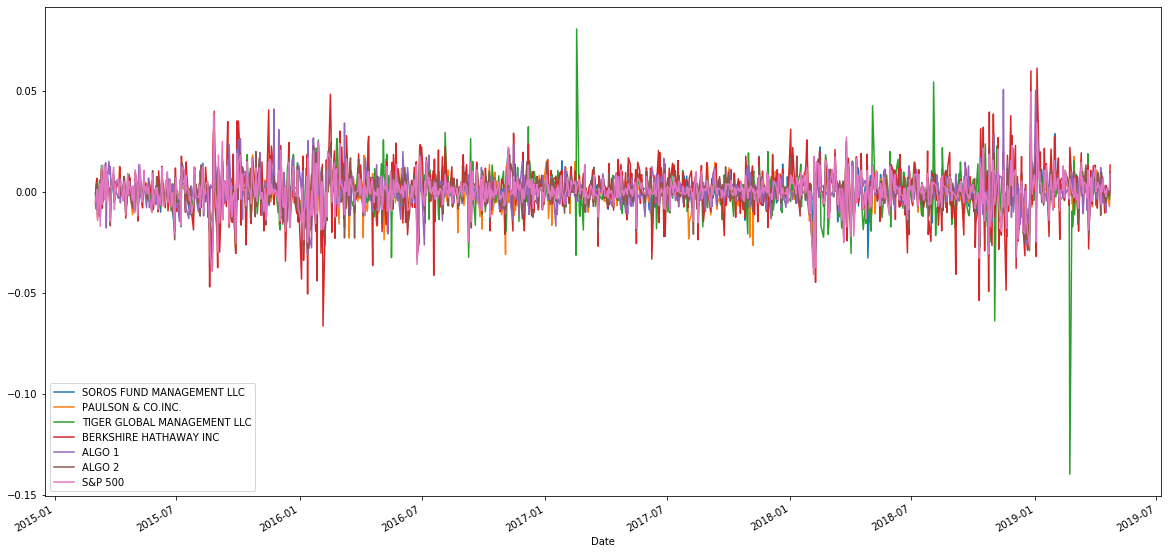

In [49]:
# Plot daily returns
# YOUR CODE HERE
plot_daily_rtn = combined_rtn.plot(figsize=(20,10))
plot_daily_rtn.legend(
    ['SOROS FUND MANAGEMENT LLC',
        'PAULSON & CO.INC.',
        'TIGER GLOBAL MANAGEMENT LLC',
        'BERKSHIRE HATHAWAY INC',
        'ALGO 1',
        'ALGO 2',
        'S&P 500'
    ])

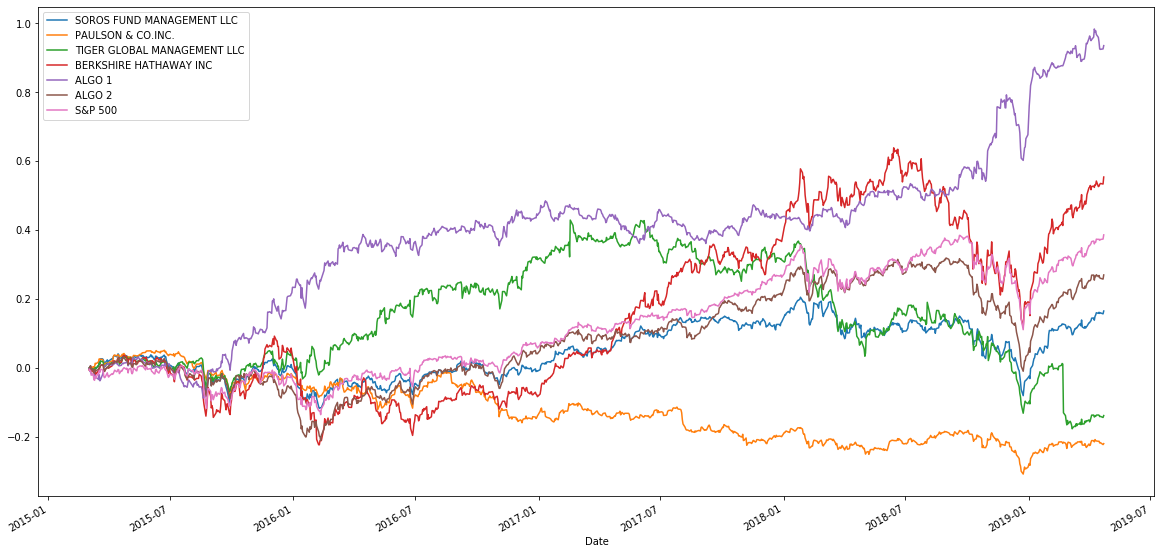

In [50]:

# Plot cumulative returns
commbined_cumulative_returns = (1 + combined_rtn).cumprod() - 1

plot_cumulative_returns = commbined_cumulative_returns.plot(figsize=(20,10))
plot_cumulative_returns.legend(
    ['SOROS FUND MANAGEMENT LLC',
        'PAULSON & CO.INC.',
        'TIGER GLOBAL MANAGEMENT LLC',
        'BERKSHIRE HATHAWAY INC',
        'ALGO 1',
        'ALGO 2',
        'S&P 500'
    ])

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

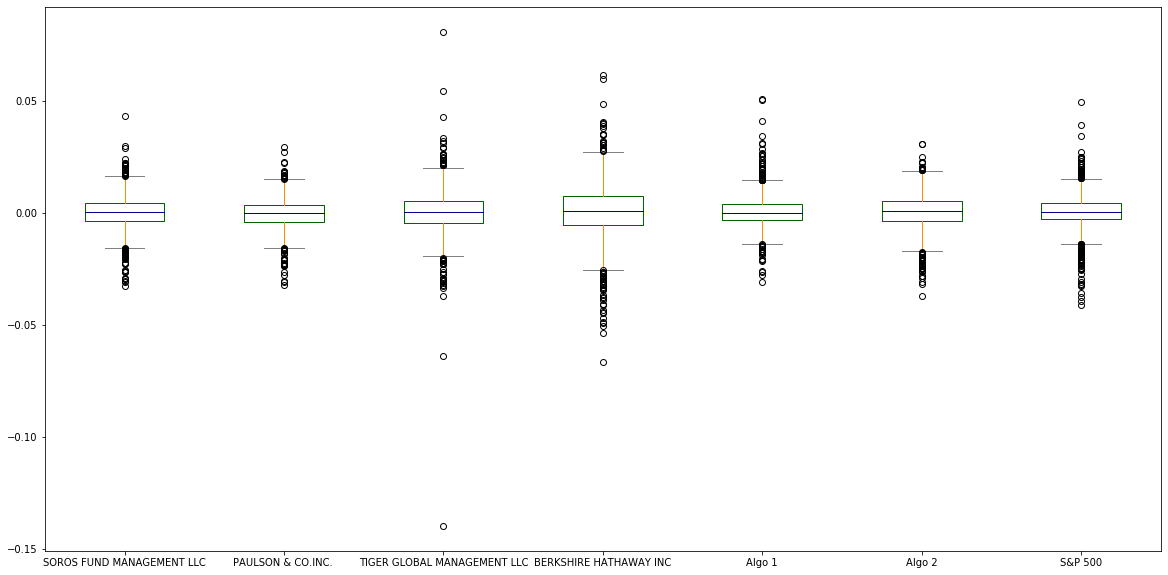

In [51]:
# Box plot to visually show risk
# YOUR CODE HERE

# Box plot to visually show risk
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}
boxplot = combined_rtn.plot.box(color=color, figsize=(20,10))

In [52]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_rtn_std = combined_rtn.std()
combined_rtn_std.sort_values(inplace=True)
combined_rtn_std

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [53]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_rtn_std.head(4)

PAULSON & CO.INC.            0.007023
Algo 1                       0.007620
SOROS FUND MANAGEMENT LLC    0.007895
Algo 2                       0.008342
dtype: float64

In [54]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
combined_rtn_std = combined_rtn.std() * np.sqrt(252)
combined_rtn_std.sort_values(inplace=True)
combined_rtn_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

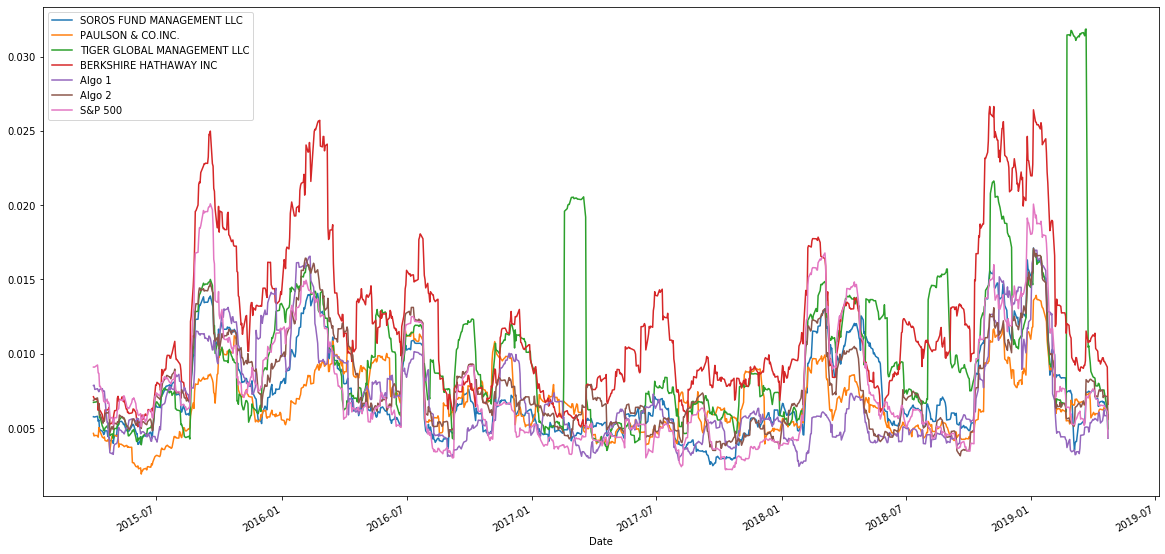

In [55]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
rolling_std = combined_rtn.rolling(window=21).std()
rolling_std.plot(figsize=(20,10))

In [56]:
# Construct a correlation table
# YOUR CODE HERE
combined_corr = combined_rtn.corr()
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


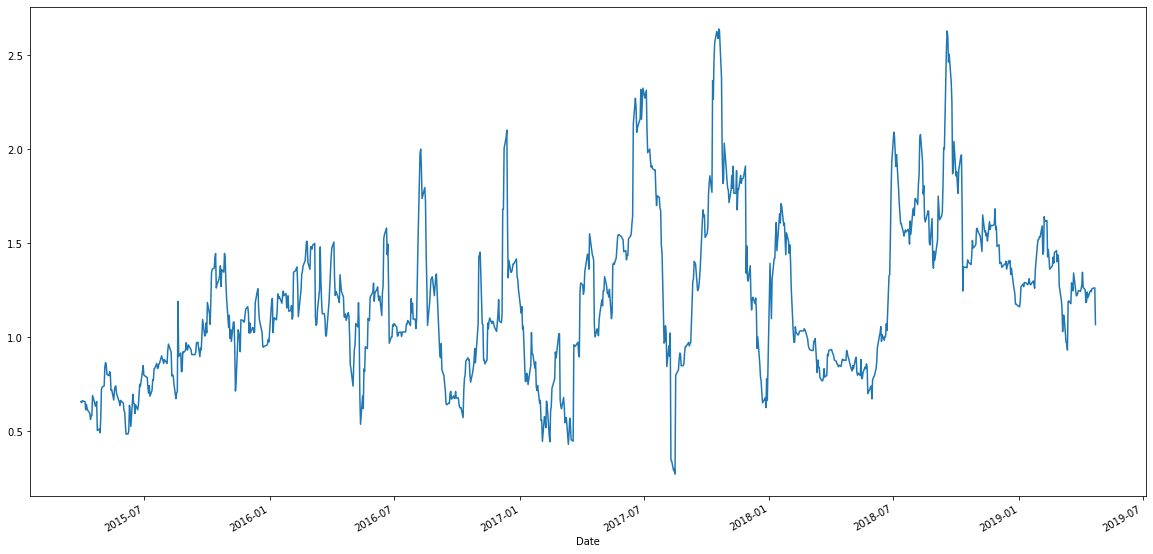

In [57]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Beta = portfolio covaraince over S&P 500 / Variance of S&P 500

# Calculate rolling 21 covariance of BKH over S&P 500
BKH_covariance = combined_rtn['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_rtn['S&P 500'])

# Caculate rolling 21 days varaince of S&P 500
SP500_variance = combined_rtn['S&P 500'].rolling(window=21).var()

# Calulate Beta
BKH_beta = BKH_covariance / SP500_variance

BKH_beta.plot(figsize=(20,10))

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

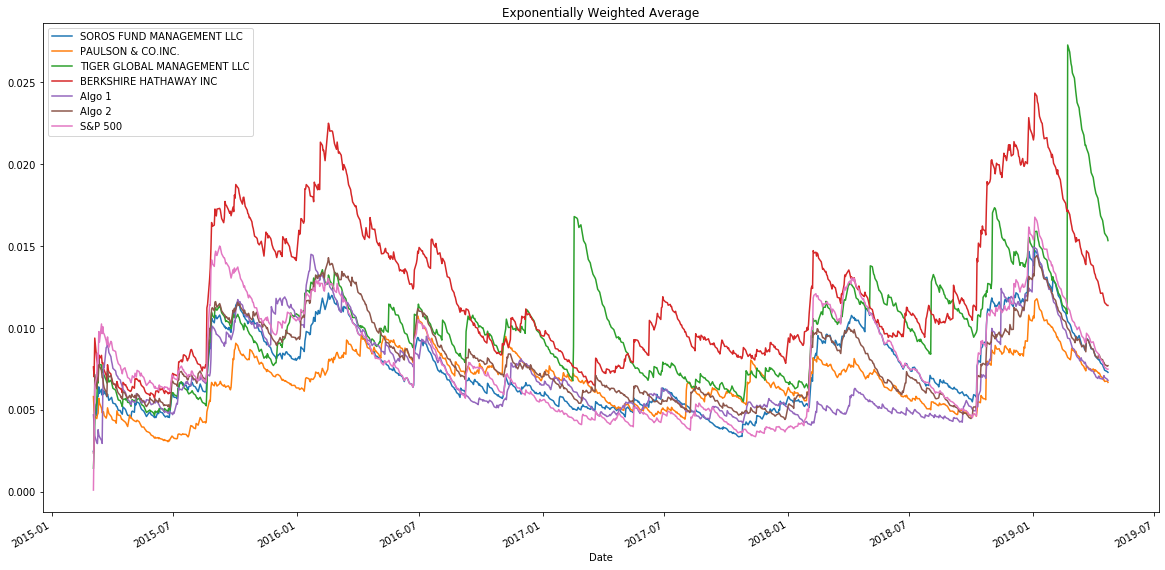

In [25]:
# (OPTIONAL) YOUR CODE HERE


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [58]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

####SHARPE####

# Annualzied Sharpe Ratios
sharpe_ratios = (combined_rtn.mean() * 252) / (combined_rtn.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

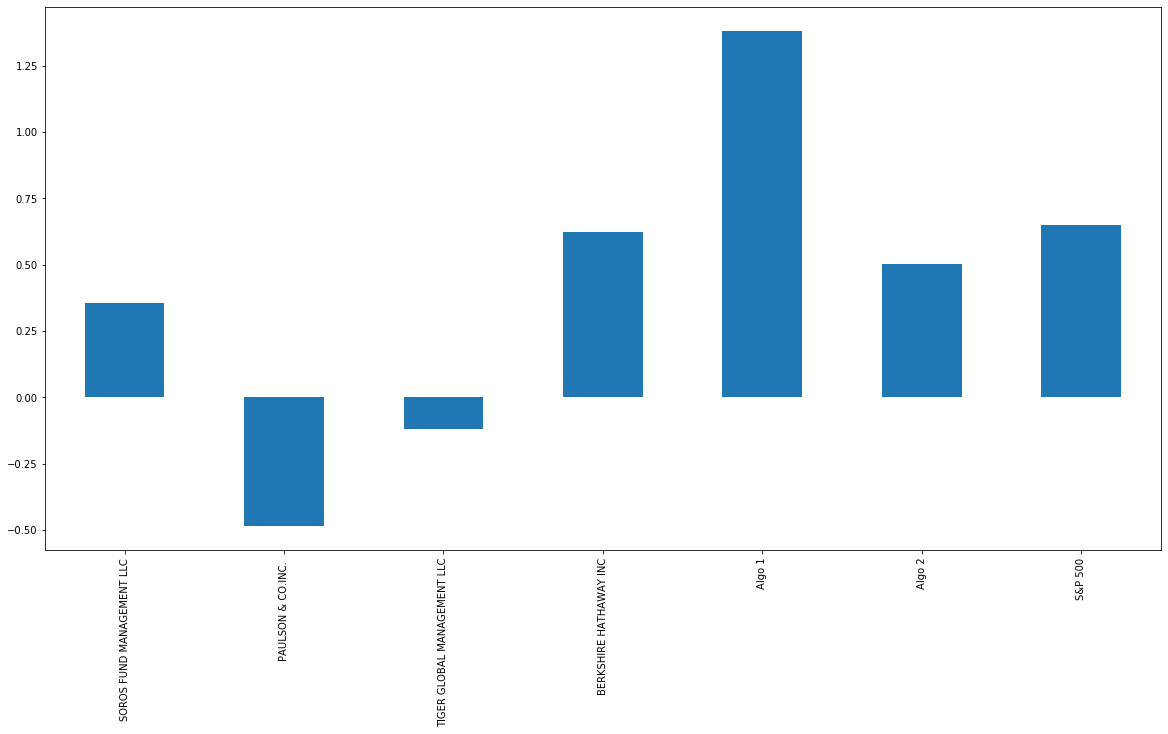

In [59]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE


# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10))


---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [103]:
# Read the first stock
aapl_path_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path_csv, infer_datetime_format=True, parse_dates=True)

appl_df.head()

aapl_df.dtypes



#Convert string date to datetime
aapl_df['Trade DATE'] = pd.to_datetime(aapl_df['Trade DATE'])
aapl_df.dtypes

# Sort dataframe by Trade DATE
aapl_df = aapl_df.sort_values('Trade DATE')

# Show top few rows of dataframe
aapl_df.head()

,Symbol,Trade DATE,NOCP
249,AAPL,2018-05-11,188.59
248,AAPL,2018-05-14,188.15
247,AAPL,2018-05-15,186.44
246,AAPL,2018-05-16,188.18
245,AAPL,2018-05-17,186.99


In [104]:
# Read the second stock
# YOUR CODE HERE


# Read the second stock
cost_historical_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_historical_csv, infer_datetime_format=True, parse_dates=True)

# Check the format for Trade DATE
cost_df.dtypes

# Convert string date to datetime
cost_df['Trade DATE'] = pd.to_datetime(cost_df['Trade DATE'])
cost_df.dtypes

# Sort dataframe by Trade DATE
cost_df = cost_df.sort_values('Trade DATE')

# Show top few rows of dataframe
cost_df.head()

,Symbol,Trade DATE,NOCP
249,COST,2018-05-11,195.76
248,COST,2018-05-14,195.88
247,COST,2018-05-15,195.48
246,COST,2018-05-16,198.71
245,COST,2018-05-17,199.60


In [106]:
# Read the third stock
# YOUR CODE HERE

# Read the third stock
goog_historical_csv = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_historical_csv, infer_datetime_format=True, parse_dates=True)

# Check the format for Trade DATE
goog_df.dtypes

# Convert string date to datetime
goog_df['Trade DATE'] = pd.to_datetime(goog_df['Trade DATE'])
goog_df.dtypes

# Sort dataframe by Trade DATE
goog_df = goog_df.sort_values('Trade DATE')

# Show top few rows of dataframe
goog_df.head()

,Symbol,Trade DATE,NOCP
249,GOOG,2018-05-11,1098.26
248,GOOG,2018-05-14,1100.20
247,GOOG,2018-05-15,1079.23
246,GOOG,2018-05-16,1081.77
245,GOOG,2018-05-17,1078.59


In [107]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

# Concatenate all stocks into a single DataFrame
custom_df = pd.concat([aapl_df, cost_df, goog_df], axis="rows")
#custom_df.shape
custom_df.index

Int64Index([249, 248, 247, 246, 245, 244, 243, 242, 241, 240,
            ...
              9,   8,   7,   6,   5,   4,   3,   2,   1,   0],
           dtype='int64', length=750)

In [108]:
# Reset the index
# YOUR CODE HERE

custom_df.reset_index(drop=True, inplace=True)
custom_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,2018-05-11,188.59
1,AAPL,2018-05-14,188.15
2,AAPL,2018-05-15,186.44
3,AAPL,2018-05-16,188.18
4,AAPL,2018-05-17,186.99


In [109]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

combined_pivot_df = custom_df.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
combined_pivot_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [110]:
# Drop Nulls
# YOUR CODE HERE

# Calculate the daily returns for individual stock in the custom portfolio 
custom_returns_df = combined_pivot_df.pct_change()

# Drop Nulls in the custom returns dataframe
custom_returns_df.dropna(axis=0, how='any', inplace=True)
custom_returns_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [111]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

custom_portfolio_returns = custom_returns_df.dot(weights)
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [114]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE


# Change the index name for custom purtfolio return from Trade DATE to Date
custom_portfolio_returns.index.names = ["Date"]

# Append the custom portfolio returns to the original combined returns dataframe
combined_rtn = pd.concat([combined_rtn, custom_portfolio_returns], axis="columns", join="inner")

# Rename the 0 column as Custom
combined_rtn.rename(columns={0: "Custom"}, inplace=True)
combined_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [125]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

# Only compare dates where the new, custom portfolio has dates
combined_rtn.isnull().sum()
mod_df =combined_rtn.drop(combined_rtn.index[0],inplace=True)

In [126]:
combined_rtn.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [124]:
# Risk
# YOUR CODE HERE

risk = combined_rtn.std()
risk
party = risk * np.sqrt(252)
party

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

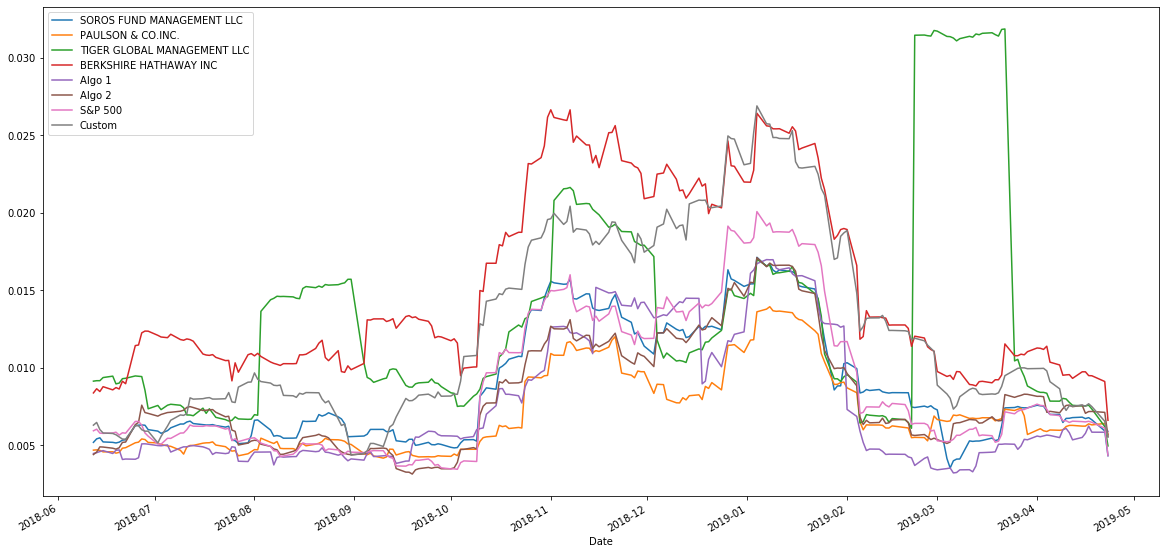

In [118]:
# Rolling
# YOUR CODE HERE


# Rolling
combined_rolling_std_df = combined_rtn.rolling(window=21).std()
combined_rolling_std_df.plot(figsize=(20,10))

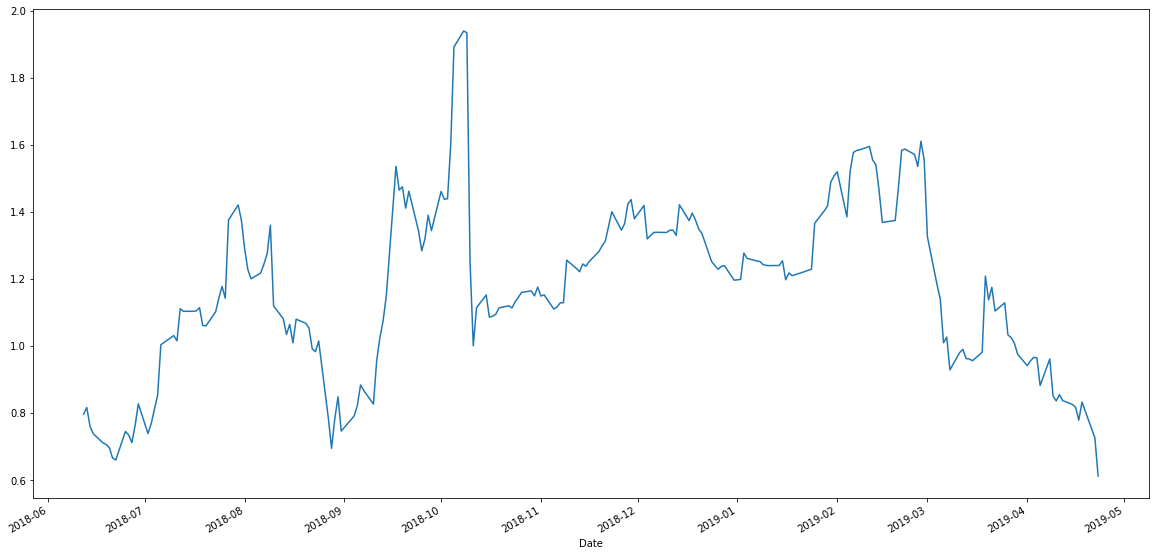

In [119]:
# Beta
# YOUR CODE HERE

# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Beta = portfolio covaraince over S&P 500 / Variance of S&P 500

# Calculate rolling 21 covariance of Custom over S&P 500
Custom_covariance = combined_rtn['Custom'].rolling(window=21).cov(combined_rtn['S&P 500'])

# Caculate rolling 21 days varaince of S&P 500
SP500_variance = combined_rtn['S&P 500'].rolling(window=21).var()

# Calulate Beta
Custom_beta = Custom_covariance / SP500_variance

Custom_beta.plot(figsize=(20,10))

In [120]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (combined_rtn.mean() * 252) / (combined_rtn.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

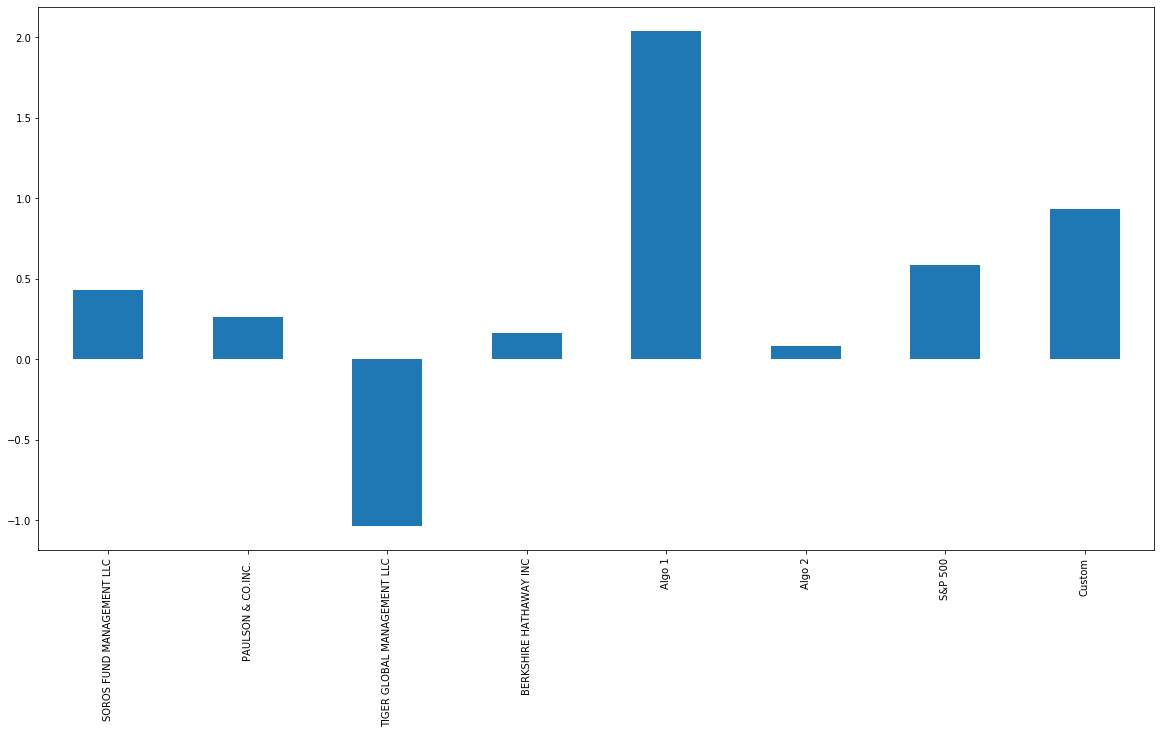

In [121]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE


# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [122]:
# YOUR CODE HERE


# Caluculate correlation between each of the portfolios
combined_returns_corr_df = combined_rtn.corr()
combined_returns_corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


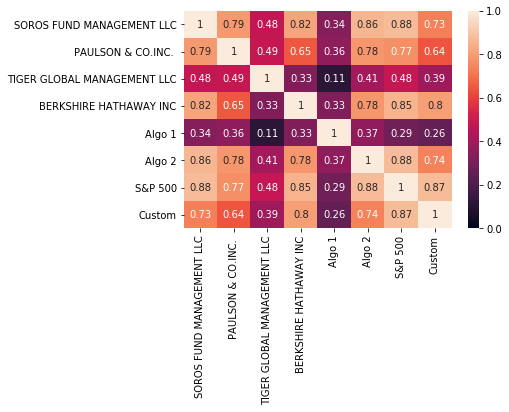

In [123]:
# import seaborn library to plot a heatmap
import seaborn as sns

# Plot heat map with coorelations
sns.heatmap(combined_returns_corr_df, vmin=0, vmax=1, annot=True)